## About iPython Notebooks ##

iPython Notebooks are interactive coding environments embedded in a webpage. You will be using iPython notebooks in this class. Make sure you fill in any place that says `# BEGIN CODE HERE #END CODE HERE`. After writing your code, you can run the cell by either pressing "SHIFT"+"ENTER" or by clicking on "Run" (denoted by a play symbol). Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). 

 **What you need to remember:**

- Run your cells using SHIFT+ENTER (or "Run cell")
- Write code in the designated areas using Python 3 only
- Do not modify the code outside of the designated areas
- In some cases you will also need to explain the results. There will also be designated areas for that. 

Fill in your **NAME** and **AEM** below:

In [1]:
NAME = "Andreas Andreadis"
AEM = 2729

---

# Assignment 2 - Decision Trees #

Welcome to your second assignment. This exercise gives you an introduction to [scikit-learn](https://scikit-learn.org/stable/). A simple but efficient machine learning library in Python. It also gives you a wide understanding on how decision trees work. 

After this assignment you will:
- Be able to use the scikit-learn library and train your own model from scratch.
- Be able to train and understand decision trees.

In [2]:
# Always run this cell
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
import unittest

# USE THIS RANDOM VARIABLE TO PRODUCE THE SAME RESULTS
RANDOM_VARIABLE = 42

## 1. Scikit-Learn and Decision Trees ##

You are going to use the scikit-learn library to train a model for detecting breast cancer using the [Breast cancer wisconsin (diagnostic) dataset](https://scikit-learn.org/stable/datasets/index.html#breast-cancer-wisconsin-diagnostic-dataset) by training a model using [decision trees](https://scikit-learn.org/stable/modules/tree.html).

**1.1** Load the breast cancer dataset using the scikit learn library and split the dataset into train and test set using the appropriate function. Use 30% of the dataset as the test set. Define as X the attributes and as y the target values. Do not forget to set the random_state parameter as the *RANDOM_VARIABLE* defined above. Use this variable for all the random_state parameters in this assignment.

In [3]:
# BEGIN CODE HERE
X, y = load_breast_cancer(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_VARIABLE)

#END CODE HERE

In [4]:
print("Size of train set:{}".format(len(y_train)))
print("Size of test set:{}".format(len(y_test)))
print("Unique classes:{}".format(len(set(y_test))))

Size of train set:398
Size of test set:171
Unique classes:2


**Expected output**:  
Size of train set:398  
Size of test set:171  
Unique classes:2  

**1.2** Train two DecisionTree classifiers and report the F1 score. Use the information gain for the one classifier and the Gini impurity for the other

In [5]:
# BEGIN CODE HERE
classifier_gini = DecisionTreeClassifier(criterion='gini', random_state=RANDOM_VARIABLE)
classifier_igain = DecisionTreeClassifier(criterion='entropy', random_state=RANDOM_VARIABLE)

classifier_gini = classifier_gini.fit(X_train,y_train)
classifier_igain = classifier_igain.fit(X_train,y_train)

prediction_gini = classifier_gini.predict(X_test)
prediction_igain = classifier_igain.predict(X_test)

f_measure_gini = f1_score(y_test, prediction_gini)
f_measure_igain = f1_score(y_test, prediction_igain)

#END CODE HERE

In [6]:
print("F-Measure Gini:{}".format(f_measure_gini))
print("F-Measure Information Gain:{}".format(f_measure_igain))

F-Measure Gini:0.9528301886792453
F-Measure Information Gain:0.9724770642201834


**Expected output**:  
F-Measure Gini:0.9528301886792453  
F-Measure Information Gain:0.9724770642201834  


**1.3** Find the maximum depth reached by the tree that used the Gini impurity. Train multiple classifier by modifying the max_depth within the range from 1 to maximum depth and save the f1 scores to lists.  

In [7]:
# BEGIN CODE HERE
depth = classifier_gini.tree_.max_depth
fscores_train = []
fscores_test = []
for d in range(1,depth+1):
    dt_classifier = DecisionTreeClassifier(criterion='gini', random_state=RANDOM_VARIABLE, max_depth=d)
    dt_classifier.fit(X_train, y_train)
    y_train_pred = dt_classifier.predict(X_train)
    y_test_pred = dt_classifier.predict(X_test)
    f_measure_train = f1_score(y_train, y_train_pred)
    f_measure_test = f1_score(y_test, y_test_pred)
    fscores_train.append(f_measure_train)
    fscores_test.append(f_measure_test)

#END CODE HERE

In [8]:
print("Fscores Train:{}".format(fscores_train))
print("Fscores Test:{}".format(fscores_test))


Fscores Train:[0.9392712550607287, 0.9533468559837729, 0.9761904761904762, 0.996, 0.996, 0.9979959919839679, 1.0]
Fscores Test:[0.9150943396226415, 0.9444444444444444, 0.9724770642201834, 0.9629629629629629, 0.9629629629629629, 0.9674418604651163, 0.9528301886792453]


**Expected output**:  
Fscores Train:[0.9392712550607287, 0.9533468559837729, 0.9761904761904762, 0.996, 0.996, 0.9979959919839679, 1.0]  
Fscores Test:[0.9150943396226415, 0.9444444444444444, 0.9724770642201834, 0.9629629629629629, 0.9629629629629629, 0.9674418604651163, 0.9528301886792453]



**1.4** Compare the results from the train set with the results from the test set. What do you notice? Explain your findings. How are you going to choose the max_depth of your model?

Μπορούμε εύκολα να παρατηρήσουμε ότι ενώ το F1 score για τα train data αυξάνεται όσο αυξάνεται και το max_depth, για τα test data αυξάνεται μέχρι ένα συγκεκριμένο σημείο (max_depth = 3) που είναι το peak και στη συνέχεια ελαττώνεται. Αυτό συμβαίνει διότι όσο μεγαλύτερο το βάθος τόσο πιο σύνθετο και το δέντρο που έχουμε φτιάξει. Ο classifier έχει προσαρμοστεί με μεγάλη ακρίβεια στα train data και χάνει τη δυνατότητα να κάνει εξίσου καλές προβλέψεις για άγνωστα δεδομένα. Έτσι εμφανίζεται το φαινόμενο του overfitting.

Για max_depth θα διάλεγα την τιμή **max_depth = 3**, για την οποία στο συγκεκριμένο παράδειγμα ο classifier αποδίδει εξίσου καλά τόσο για τα train όσο και για τα test δεδομένα.


## 2.0 Pipelines ##

**2.1** In this part of the exercise you are going to build a pipeline from scratch for a classification problem. Load the **income.csv** file and train a DecisionTree model that will predict the *income* variable. This dataset is a modification of the original Adult Income dataset found [here](http://archive.ics.uci.edu/ml/datasets/Adult). Report the f1-score and accuracy score of the test set found in **income_test.csv**. Your pipeline should be able to handle missing values and categorical features (scikit-learn's decision trees do not handle categorical values). You can preprocess the dataset as you like in order to achieve higher scores.  

In [9]:
# BEGIN CODE HERE
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.model_selection import GridSearchCV

# read the data
df = pd.read_csv("income.csv")
df_test = pd.read_csv("income_test.csv")

# create X_train, y_train, X_test, y_test dataframes
X_train = df.drop(columns='income', axis=1)
y_train = df['income']

X_test = df_test.drop(columns='income', axis=1)
y_test = df_test['income']

# convert class labels to 0,1 (necessary for f1_score computation)
le = LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

# drop rows that include at least one missing value 
# df.head(5)
# print(df.dtypes)
# print(df.size)
# df = df.dropna(how='any')
# print(df.size)

# Decision Tree classifier 
dt = DecisionTreeClassifier(random_state=RANDOM_VARIABLE)

# numeric features transformation
numeric_features = df.select_dtypes('int64').columns.tolist()
# 1st step: simple imputer for missing values handling
# 2nd step: Scaling
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())])

# categorical features transformation
categorical_features = df.select_dtypes('object').columns.tolist()
# remove the class label from the list
categorical_features.remove('income')
# 1st step: simple imputer for missing values handling
# 2nd step: One-hot encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# column transformer
preprocessor = ColumnTransformer(
    transformers=[
         ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# final pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', dt)])

# parameter optimization with GridSearch
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'classifier__criterion' : ['gini', 'entropy'],
    'classifier__max_depth': [2,3,4,5,6,7,8,9,10]
}

# 5-fold cross-validation 
grid_search = GridSearchCV(clf, param_grid, cv=5)

# fitting train data
grid_search.fit(X_train, y_train)

# best parameters
print("Optimal parameters: ", grid_search.best_params_)

# predictions for X_test
y_pred = grid_search.predict(X_test)

# accuracy report
accScore = accuracy_score(y_test, y_pred)
print("Accuracy: ", accScore)

# f1 score report
fScore = f1_score(y_test, y_pred)
print("F1 Score: ", fScore)    

#END CODE HERE

Optimal parameters:  {'classifier__criterion': 'gini', 'classifier__max_depth': 9, 'preprocessor__num__imputer__strategy': 'mean'}
Accuracy:  0.8519098922624878
F1 Score:  0.6428346456692914


**2.2** Describe the process you followed to achieve the results above. Your description should include, but is not limited to the following 
- How do you handle missing values and why
- How do you handle categorical variables and why
- Any further preprocessing steps
- How do you evaluate your model and how did you choose its parameters 
- Report any additional results and comments on your approach.

Το τελικό **pipeline** που δημιουργησα αποτελείται απο δυο steps:

- **1st step: preprocessing**
        
   Το κομμάτι του preprocessing αποτελείται απο 2 επιμέρους pipelines στα οποία ακολουθείται διαφορετική διαδικασία για τα numeric και τα categorical features αντίστοιχα.

    Στα numeric features με τον SimpleImputer αντικαθιστούμε τυχόν missing values με τον μέσο όρο ή τη διάμεσο του αντίστοιχου feature/column, ενω στη συνέχεια εφαρμόζουμε και scaling στα δεδομένα με τον MinMaxScaler.

    Στα categorical features με τον SimpleImputer αναθέτουμε στα missing values μια νέα τιμή "missing" δημιουργώντας στην ουσία μια ξεχωριστή κατηγορία. Έπειτα, εφαρμόζουμε One-Hot Encoding στα categorical features προκειμένου να τα μετατρέψουμε σε binary vectors και να μπορούμε να τα διαχειριστούμε στο επόμενο βήμα με τον DecisionTree classifier.

**Παρατήρηση**: Επειδή στο συγκεκριμένο παράδειγμα τα missing values είναι πολύ λίγα σχετικά με το συνολικό dataset θα μπορούσαμε να κάνουμε και εξαρχής drop όλα τα instances που έχουν τουλάχιστον ένα missing value χωρίς να επηρεαστεί αρνητικά η απόδοση του μοντέλου.

- **2nd step: classification**

    Στο δεύτερο step έχουμε εναν decision tree classifier που μετά το preprocessing που έγινε στο 1ο step μπορεί να διαχειριστεί τα δεδομένα μας δημιουργώντας ένα αξιοπιστο μοντέλο

**Parameter Optimization**: GridSearchCV

   Με το GridSearchCV εκτελούμε 5-fold cross-validation για να βρούμε τις καλύτερες παραμέτρους για μοντέλο μας. Κάνουμε παραμετροποίηση τόσο στα χαρακτηριστικά του classifier(criterion, max_depth) όσο και στον τρόπο που αντικαθιστούμε τα αριθμητικά missing values(mean or median). Το evaluation γίνεται με βάση το accuracy που πετυχαίνει κάθε παραλλαγή του μοντέλου και το GridSearch μας επιστρέφει τις καλύτερες παραμέτρους.  
    Με αυτές τις optimal παραμέτρους εκπαιδεύουμε τελικά τον classifier και κάνουμε predictions για τα test data.

**Best Results achieved**: 

   - **Accuracy**:  0.8519098922624878

   - **F1 Score**:  0.6428346456692914

   


## 3.0 Common Issues ## 

**3.0** Run the following code to define a DecisionTreeModel and load the **income** dataset only with the numerical variables. Then, answer the following questions. 

In [10]:
# Load Data
columns = ['age','fnlwgt','education_num','hours-per-week',"capital-loss","capital-gain","income"]
data = pd.read_csv('income.csv',usecols=columns)
data_test = pd.read_csv('income_test.csv',usecols=columns)
# Convert target variable to 0 and 1
data["income"] = data["income"].map({ "<=50K": 0, ">50K": 1 })
data_test["income"] = data_test["income"].map({ "<=50K": 0, ">50K": 1 })
# Create X and y
X_train = data.drop(["income"],axis=1)
y_train = data['income'].values
X_test = data_test.drop(["income"],axis=1)
y_test = data_test['income'].values
# Classifier
classifier = DecisionTreeClassifier(min_samples_leaf=4)

**3.1** Draw a learning curve for the classifer for the train and test set loaded above.

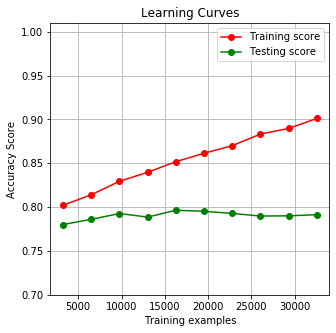

In [11]:
# BEGIN CODE HERE

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

def learning_curve(classifier, X, y):
    
    total_train_samples = len(X)

    # array of train scores
    train_scores_list = []
    # array of test scores
    test_scores_list = []
    # array of number of data samples used at each iteration
    train_sizes = []
    
    # train iteratively multiple classifiers by adding 10% of total instances to the train data each time
    for i in range(1,11):
        
        num_of_samples = int((i/10)* total_train_samples)
        train_sizes.append(num_of_samples)
        
        # get i/10 of train data
        X_train_sample = X[0:num_of_samples]
        y_train_sample = y[0:num_of_samples]
        
        # train the classifier
        classifier.fit(X_train_sample, y_train_sample)
        
        # make predictions for train data
        y_train_pred = classifier.predict(X_train)
        train_score = accuracy_score(y_train_pred, y_train)
        train_scores_list.append(train_score)
        
        # make predictions for test data
        y_test_pred = classifier.predict(X_test)
        test_score = accuracy_score(y_test_pred, y_test)
        test_scores_list.append(test_score)
        

    # Plot learning curves
    plt.title("Learning Curves")
    
    # grid type
    plt.grid()
    
    # set y-axes limits
    plt.ylim((0.7, 1.01))
    
    # set axes labels
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy Score")
    
    # draw curves
    plt.plot(train_sizes, train_scores_list, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_list, 'o-', color="g", label="Testing score")
    
    # set legend
    plt.legend(loc="best")
        
    return plt

# create a figure
fig = plt.figure(figsize=(5, 5))

# plot learning curves of the classifier
curves = learning_curve(classifier, X_train, y_train)
curves.show()

#END CODE HERE

**3.2** Do you notice any problems with the classifier? If so, what can you do to change this.

Εκπαιδεύσαμε επαναληπτικά τον classifier προσθέτωντας κάθε φορά **10%** των συνολικών δεδομενων στο σύνολο εκπαιδευσης και κάναμε predictions πάνω στα X_train και X_test. Στον x άξονα φαίνεται το πλήθος των δεδομένων που χρησιμοποιήθηκαν για την εκπαίδευση ενώ στο y άξονα το **accuracy score** του μοντέλου σε κάθε περίπτωση.

Όπως διακρίνουμε στις καμπύλες παραπάνω, η ακρίβεια για τα train δεδομένα αυξάνεται όσο προσθέτουμε περισσότερα δεδομένα στo train sample, ενώ χρησιμοποιώντας όλα τα διαθέσιμα δεδομένα το accuracy score φτάνει στο **90%**. Την ίδια στιγμή για τα test δεδομένα η ακρίβεια δεν ξεπερνάει το **80%** και μάλιστα παραμένει στα ίδια επίπεδα ανεξάτητα απο το πλήθος των train samples. Παρατηρούμε λοιπόν πως υπάρχει το φαινόμενο του **overfitting**. Όσο προσθέτουμε train data στο μοντέλο μας ο classifier κάνει όλο και καλύτερο fit πάνω σε αυτά, όμως την ίδια στιγμή δεν είναι το ίδιο αξιόπιστος πάνω σε άγνωστα δεδομένα όσο στα δεδομένα με τα όποια εκπαιδεύτηκε. Στόχος μας είναι να φτιάξουμε ένα πιο γενικευμένο μοντέλο που θα κάνει καλύτερες προβλέψεις πάνω σε νέα δεδομένα. 

Ο classifier που έχουμε χρησιμοποιήσει πιο πάνω είναι ο εξής: classifier = DecisionTreeClassifier(min_samples_leaf=4)

Θα πρέπει να κάνουμε parameter tuning στις παραμέτρους **'max_depth', 'min_samples_leaf' και 'min_samples_split'** προκειμένου να βρούμε αυτές για τις οποιές το μοντέλο μας αποδίδει καλύτερα σε άγνωστα δεδομένα.

Ένας τρόπος να το πετύχουμε αυτό είναι με το **GridSearchCV**.


**3.3** Implement your solution using the cells below. Report your results and the process you followed. 

Best parameters:  {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 9, 'min_samples_split': 2}
Accuracy:  0.8267058439438459


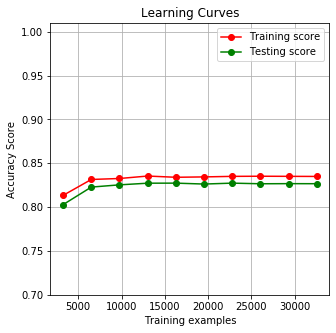

In [12]:
# BEGIN CODE HERE
%matplotlib inline

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score

clf = DecisionTreeClassifier()

param_grid = {
    'max_depth': [x for x in range(1,10)],
    'criterion' : ['gini', 'entropy'],
    'min_samples_leaf':   [x for x in range(1,10)],
    'min_samples_split':  [x for x in range(2,10)]
}

# 5-fold cross-validation 
grid_search = GridSearchCV(clf, param_grid, cv=5)

# fit train data
grid_search.fit(X_train, y_train)

# print best parameters
print("Best parameters: ", grid_search.best_params_)

# predictions of X_test
y_pred = grid_search.predict(X_test)

final_score = accuracy_score(y_test, y_pred)
print("Accuracy: ", final_score)

# optimal classifier 
optimal_clf = grid_search.best_estimator_

fig = plt.figure(figsize=(5, 5))

# plot learnig curves for the optimal classifier
new_curves = learning_curve(optimal_clf, X_train, y_train)
new_curves.show()

#END CODE HERE

Έχοντας βρει με το GridSearchCV τον **optimal estimator** ως προς την ακρίβεια πάνω στο validation set σχεδίασα ξανά τις learning curves για το νέο μας μοντέλο.

Όπως μπορούμε εύκολα να διακρίνουμε από το plot παραπάνω, τώρα οι καμπύλες είναι πολύ κοντά η μια με την άλλη οπότε καταφέραμε να εξαλείψουμε το φαινόμενο του **overfitting**. Μπορεί να ελαττώθηκε λίγο η ακρίβεια για τα train data, αλλά δεν υπάρχει σημαντική απόκλιση απο την αποδοση για τα test data, πράγμα που είναι και το ζητούμενο της Μηχανικής μάθησης σε real life εφαρμογές. Ως αποτέλεσμα, βλέπουμε πως το μοντέλο μας έχει γίνει πιο γενικευμένο και πιο αξιόπιστο σε άγνωστα δεδομένα για αυτό και υπερισχύει της προηγούμενης υλοποίησης. Η ακρίβεια στα test data είναι πλέον της τάξης του **83%**.